In [1]:
from pathlib import Path
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from pathlib import Path

### Part 1: Prepare the Data

1. Read `myopia.csv` into a Pandas DataFrame.

2. Remove the "MYOPIC" column from the dataset.

    * **Note:** The target column is needed for supervised machine learning, but it will make an unsupervised model biased. After all, the target column is effectively providing clusters already! 

3. Standardize your dataset so that columns that contain larger values do not influence the outcome more than columns with smaller values.

In [2]:
file_path = "./data/myopia.csv"
df = pd.read_csv(file_path)
df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [3]:
df2 = df.drop("MYOPIC", axis=1)
df2

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,6,0.678,22.400000,3.663,3.803,14.93,2,0,7,3,14,37,1,0
614,6,0.665,22.500000,3.570,3.378,15.56,6,0,1,0,8,10,1,1
615,6,1.834,22.940001,3.624,3.424,15.89,8,0,0,0,4,4,1,1
616,6,0.665,21.920000,3.688,3.598,14.64,12,2,1,0,15,23,0,0


In [4]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df2)

### Part 2: Apply Dimensionality Reduction

1. Perform dimensionality reduction with PCA. How did the number of the features change?


  * **Hint:** Rather than specify the number of principal components when you instantiate the PCA model, state the desired **explained variance**. For example, say that a dataset has 100 features. Using `PCA(n_components=0.99)` creates a model that will preserve approximately 99% of the explained variance, whether that means reducing the dataset to 80 principal components or 3. For this assignment, preserve 90% of the explained variance in dimensionality reduction.

2. Further reduce the dataset dimensions with t-SNE and visually inspect the results. To do this, run t-SNE on the principal components, which is the output of the PCA transformation. 

3. Create a scatter plot of the t-SNE output. Are there distinct clusters?

In [5]:
pca = PCA(n_components=0.90)
pca_transformed_data = pca.fit_transform(scaled_data)

In [6]:
tsne = TSNE(learning_rate=100)
transformed_features = tsne.fit_transform(pca_transformed_data)

In [7]:
df2["x"] = transformed_features[:,0]
df2["y"] = transformed_features[:,1]
df2["class"] = df["MYOPIC"]

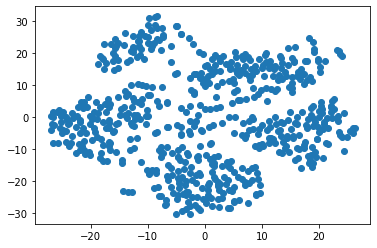

In [8]:
plt.scatter(df2["x"], df2["y"])
plt.show()

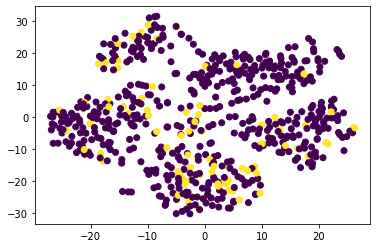

In [9]:
plt.scatter(df2["x"], df2["y"], c=df2["class"])
plt.show()

### Part 3: Perform a Cluster Analysis with K-means

Create an elbow plot to identify the best number of clusters. Make sure to do the following:

* Use a `for` loop to determine the inertia for each `k` between 1 through 10. 

* If possible, determine where the elbow of the plot is, and at which value of `k` it appears.

In [10]:
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(transformed_features)
    inertia.append(km.inertia_)

C:\Users\Matt\anaconda3\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  f"KMeans is known to have a memory leak on Windows "


In [11]:
# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

,k,inertia
0,1,246087.109375
1,2,148681.171875
2,3,89506.281250
3,4,58886.488281
4,5,39057.285156


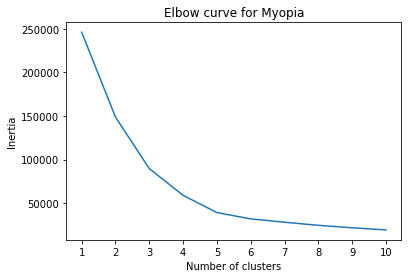

In [27]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow["k"], df_elbow["inertia"])
plt.xticks(range(1,11))
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.title("Elbow curve for Myopia")
plt.show()

In [13]:
len(pca.components_)

10

In [14]:
# Initialize PCA model
pca = PCA(n_components=10)

# Get two principal components for the data.
myopia_pca = pca.fit_transform(pca_transformed_data)

In [25]:
# Transform PCA data to a DataFrame
df_myopia_pca = pd.DataFrame(
    data=myopia_pca,
    columns=["1","2","3","4","5","6","7","8","9","10"],)
# Add the predicted class columns
# If code fails comment out labels line below. Im not sure why the code will run 50% of the time
df_myopia_pca["class"] = model.labels_
df_myopia_pca.head()

,1,2,3,4,5,6,7,8,9,10,class
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144,1
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031,0
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336,1
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400,1
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183,0


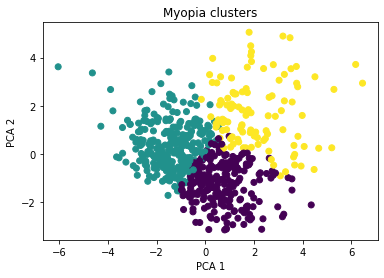

In [26]:
# Initialize the K-Means model with n_clusters 3
model = KMeans(n_clusters=3, random_state=0)

# Train the model
model.fit(df_myopia_pca)

# Predict clusters
predictions = model.predict(df_myopia_pca)

# Add predicted clusters (labels) to DataFrame
df_myopia_pca["class"] = model.labels_
# Plot the Clusters
plt.scatter(x=df_myopia_pca["1"], y=df_myopia_pca["2"], c=df_myopia_pca["class"])
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Myopia clusters")
plt.show()

### Part 4: Make a Recommendation

Based on your findings, write up a brief (one or two sentences) recommendation for your supervisor in your Jupyter Notebook. Can the patients be clustered? If so, into how many clusters? 

- t-SNE offered no help when finding clusters, when the graph was created the data overlapped so much no inference could be made
- It appears that based on the findings from the data the best number of clusters is 3.
- after preforming the k-means it appears the purple and yellow are past the k-value of 1. As the value of k goes up, the points in the cluster sum  of the sqaured value will go down.